# **TITLE OF THE PROJECT : HILL AND VALLEY PREDICTION **

**OBJECTIVE : Predict whether a given data point represents a hill or a valley based on its features.**


**DATA SOURCE : YBI-FOUNDATION GITHUB**

**IMPORT LIBRARY**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**IMPORT DATA**

In [139]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv ')

**DESCRIBE DATA**

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [141]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [142]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [143]:
df.shape

(1212, 101)

In [144]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [145]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V97      0
V98      0
V99      0
V100     0
Class    0
Length: 101, dtype: int64

**DEFINE TARGET VARIABLE (y) AND FEATURE VARIABLES (x)**

In [146]:
y = df['Class']
x = df.drop('Class',axis=1)

In [147]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

**DATA VISUALIZATION**

In [148]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


Text(0.5, 1.0, 'valley0')

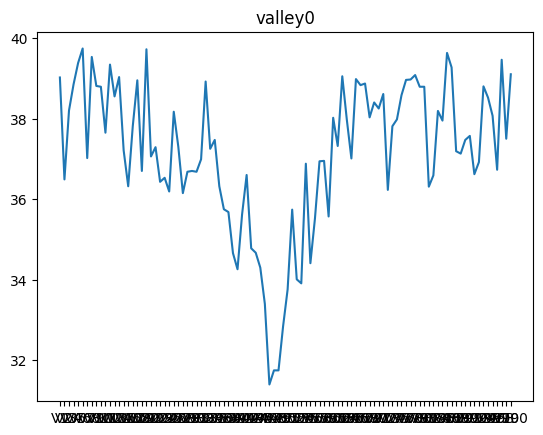

In [149]:
plt.plot(x.iloc[0, :])
plt.title('valley0')

Text(0.5, 1.0, 'valley1')

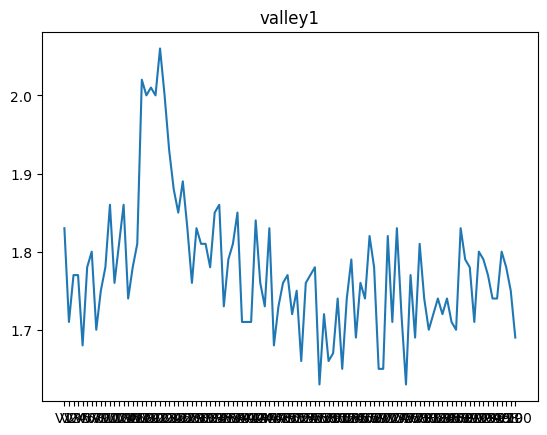

In [150]:
plt.plot(x.iloc[1, :])
plt.title('valley1')

**DATA PREPROCESSING** = GET VARIABLE 'x' STANDARDIZED

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
ss = StandardScaler()

In [153]:
x = ss.fit_transform(x)

In [154]:
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [155]:
x.shape

(1212, 100)

**TRAIN TEST SPLIT**

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2529,stratify=y)

In [158]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((909, 100), (303, 100), (909,), (303,))

**MODELING**

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
lr = LogisticRegression()

In [161]:
lr.fit(x_train,y_train)

LogisticRegression()

In [162]:
y_pred = lr.predict(x_test)

In [163]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [164]:
lr.predict_proba(x_test)

array([[0.78940512, 0.21059488],
       [0.51323156, 0.48676844],
       [0.51240671, 0.48759329],
       [0.51226436, 0.48773564],
       [0.51226751, 0.48773249],
       [0.44501233, 0.55498767],
       [0.51218392, 0.48781608],
       [0.51376901, 0.48623099],
       [0.51210424, 0.48789576],
       [0.5024677 , 0.4975323 ],
       [0.60556218, 0.39443782],
       [0.51222294, 0.48777706],
       [0.53668946, 0.46331054],
       [0.50202555, 0.49797445],
       [0.51229049, 0.48770951],
       [0.51225667, 0.48774333],
       [0.51231201, 0.48768799],
       [0.51089711, 0.48910289],
       [0.51225028, 0.48774972],
       [0.51276782, 0.48723218],
       [0.51220813, 0.48779187],
       [0.52045085, 0.47954915],
       [0.51416888, 0.48583112],
       [0.30173807, 0.69826193],
       [0.50630173, 0.49369827],
       [0.3283647 , 0.6716353 ],
       [0.43984975, 0.56015025],
       [0.00776114, 0.99223886],
       [0.28478238, 0.71521762],
       [0.51137901, 0.48862099],
       [0.

**MODEL EVALUATION**

In [165]:
from sklearn.metrics import confusion_matrix, classification_report

In [166]:
print (confusion_matrix(y_test,y_pred))

[[151   1]
 [ 98  53]]


In [167]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       152
           1       0.98      0.35      0.52       151

    accuracy                           0.67       303
   macro avg       0.79      0.67      0.64       303
weighted avg       0.79      0.67      0.64       303



**PREDICTION**

1.Extract a random row

2.Seperate x and y

3.Standardize x

4.predict y

In [168]:
x_new = df.sample(1)

In [169]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
24,32246.97,29047.8,30789.54,31565.94,31347.22,29510.76,28577.42,27006.97,26626.49,27182.31,...,30748.79,32389.63,29866.5,30863.64,30564.43,32113.57,31089.86,29795.08,29149.8,0


In [170]:
x_new = x_new.drop('Class',axis=1)

In [171]:
x_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
24,32246.97,29047.8,30789.54,31565.94,31347.22,29510.76,28577.42,27006.97,26626.49,27182.31,...,29615.22,30748.79,32389.63,29866.5,30863.64,30564.43,32113.57,31089.86,29795.08,29149.8


In [172]:
x_new = ss.fit_transform(x_new)

In [173]:
y_pred_new = lr.predict(x_new)

In [174]:
y_pred_new

array([1])

In [175]:
lr.predict_proba(x_new)

array([[0.49511293, 0.50488707]])

**EXPLAINATION**

This project involves building and evaluating a logistic regression model to classify data from the Hill Valley dataset. The dataset is loaded and initially inspected to understand its structure and contents. The features and target variable are separated, and the feature data is standardized. The data is then split into training and testing sets. A logistic regression model is trained on the training data and used to predict the class labels for the test data. The model's performance is evaluated using a confusion matrix and classification report. Additionally, the model is tested on a new, randomly selected sample from the dataset.